# Notebook Imports & Packages

In [209]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols , diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Example 1

### $f(x) = x ^ 2 + x + 1$

In [210]:
def f(x):
    return x**2 + x + 1

In [211]:
# Make data
x_1 = np.linspace( start = -3 , stop = 3 , num = 100 )

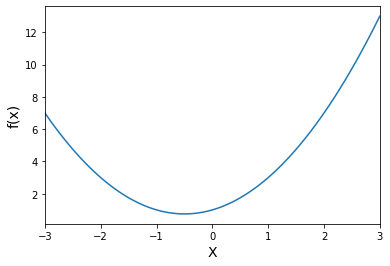

In [212]:
# Plot data
plt.xlim([-3 , 3] )
plt.xlabel('X' , fontsize=14)
plt.ylabel('f(x)' , fontsize = 14)
plt.plot( x_1 , f(x_1) )
plt.show()

## Slope & Derivative of a function

In [213]:
def df(x):
    return 2*x + 1

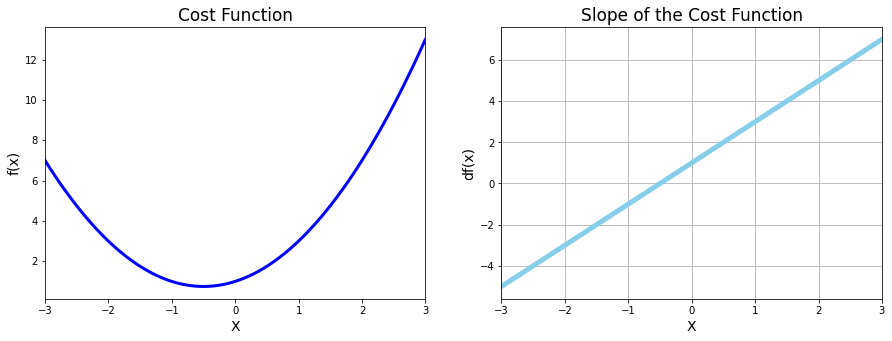

In [214]:
# Plot function & Derivative side by side

plt.figure(figsize=[15,5])

# To have two plots side by side
# First chart: Cost function
plt.subplot(1,2,1) # row col index

plt.xlim([-3 , 3] )
plt.title('Cost Function', fontsize=17)
plt.xlabel('X' , fontsize=14)
plt.ylabel('f(x)' , fontsize = 14)
plt.plot( x_1 , f(x_1) , color='blue', linewidth=3)

# Second Chart: Derivative
plt.subplot( 1, 2 , 2 )
plt.xlim([-3 , 3] )
plt.title('Slope of the Cost Function', fontsize=17)
plt.grid()
plt.xlabel('X' , fontsize=14)
plt.ylabel('df(x)' , fontsize = 14)

plt.plot( x_1, df(x_1), color='skyblue', linewidth=5 )
plt.show()

## Python Loops & Gradient Descent

In [215]:
# Gradient Descent
new_x = 3
previous_x = 0 
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for i in range(100):
    previous_x = new_x # Predict
    gradient = df(previous_x) # Calculate the error
    # the further we are from the minimum cost the greater the slope , slope will be 0 at minimum cost
    new_x = previous_x - step_multiplier * gradient # Learn
    
    x_list.append( new_x )
    slope_list.append( df(new_x) )
    
    step_size = abs(new_x - previous_x)
    if step_size < precision:
        print('Loop ran for ' , i , ' times' )
        break

print('Local Minimum occurs at: ', new_x)
print('Slope or df(x) value at this point is: ', df(new_x) )
print('Cost: ', f(new_x) )

Loop ran for  50  times
Local Minimum occurs at:  -0.49996003706460423
Slope or df(x) value at this point is:  7.992587079153068e-05
Cost:  0.7500000015970362


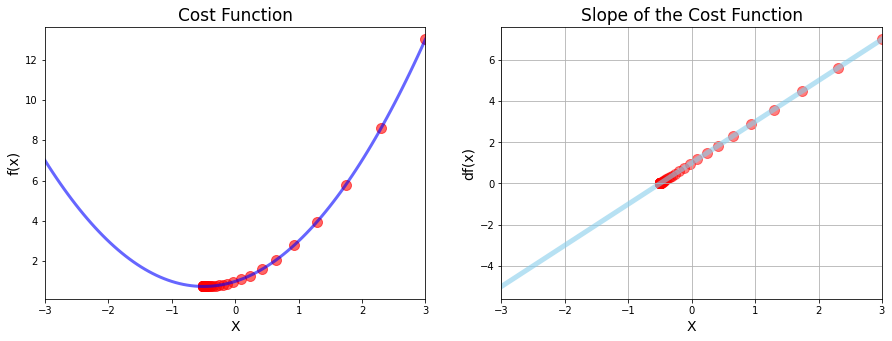

In [216]:
# Super Impose the gradient descent calculations

plt.figure(figsize=[15,5])

# To have two plots side by side
# First chart: Cost function
plt.subplot(1,2,1) # row col index

plt.xlim([-3 , 3] )
plt.title('Cost Function', fontsize=17)
plt.xlabel('X' , fontsize=14)
plt.ylabel('f(x)' , fontsize = 14)
plt.plot( x_1 , f(x_1) , color='blue', linewidth=3 , alpha = 0.6)

values = np.array(x_list)
plt.scatter(x_list , f(values) , color = 'r' , alpha = 0.6 , s = 100 ) # can't use list for my function, hence converted to array

# Second Chart: Derivative
plt.subplot( 1, 2 , 2 )
plt.xlim([-3 , 3] )
plt.title('Slope of the Cost Function', fontsize=17)
plt.grid()
plt.xlabel('X' , fontsize=14)
plt.ylabel('df(x)' , fontsize = 14)

plt.plot( x_1, df(x_1), color='skyblue', linewidth=5 , alpha = 0.6)

plt.scatter( x_list , slope_list , color='r' , s = 100 , alpha = 0.5)

plt.show()

## Multiple Minima vs Initial Guess & Advanced Functions

### $$g(x) = x ^ 4 - 4 x ^ 2 + 5$$

In [217]:
# Make some data
x_2 = np.linspace( start= -2 , stop= 2 , num= 1000 )

def g(x):
    return x**4 - 4 * x**2 + 5

def dg(x):
    return 4 * x**3 - 8 * x 

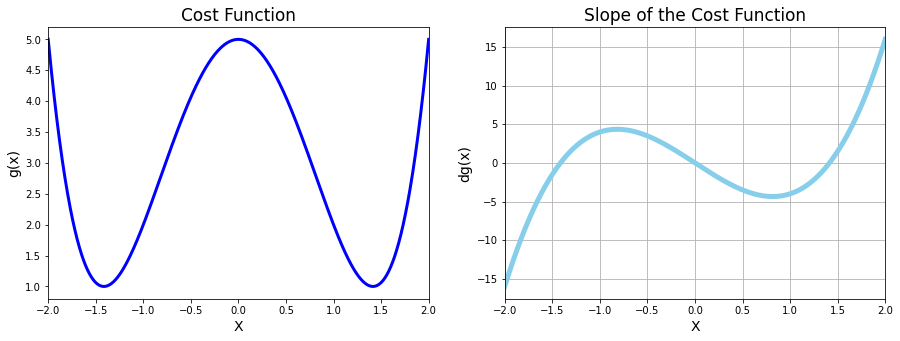

In [218]:
# Plot function & Derivative side by side

plt.figure(figsize=[15,5])

# To have two plots side by side
# First chart: Cost function
plt.subplot(1,2,1) # row col index

plt.xlim([-2 , 2] )
plt.title('Cost Function', fontsize=17)
plt.xlabel('X' , fontsize=14)
plt.ylabel('g(x)' , fontsize = 14)
plt.plot( x_2 , g(x_2) , color='blue', linewidth=3)

# Second Chart: Derivative
plt.subplot( 1, 2 , 2 )
plt.xlim([-2 , 2] )
plt.title('Slope of the Cost Function', fontsize=17)
plt.grid()
plt.xlabel('X' , fontsize=14)
plt.ylabel('dg(x)' , fontsize = 14)

plt.plot( x_2, dg(x_2), color='skyblue', linewidth=5 )
plt.show()

### Gradient Descent As A Python Function

In [219]:
def gradient_descent(derivative_func , initial_guess , learning_rate = 0.01 , precision = 0.0001  , max_iter = 300 ):
    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for i in range(max_iter):
        previous_x = new_x # Predict
        gradient = derivative_func(previous_x) # Calculate the error
        # the further we are from the minimum cost the greater the slope , slope will be 0 at minimum cost
        new_x = previous_x - learning_rate * gradient # Learn

        x_list.append( new_x )
        slope_list.append( derivative_func(new_x) )

        step_size = abs(new_x - previous_x)
        if step_size < precision:
            break
    return x_list, slope_list , new_x

In [220]:
list_x , deriv_list , local_min = gradient_descent( derivative_func=dg , initial_guess=-0.5 )
print( 'Local Min occurs at: ' , local_min )
print( 'Number of steps: ' , len(list_x ) )

Local Min occurs at:  -1.4137636556157256
Number of steps:  56


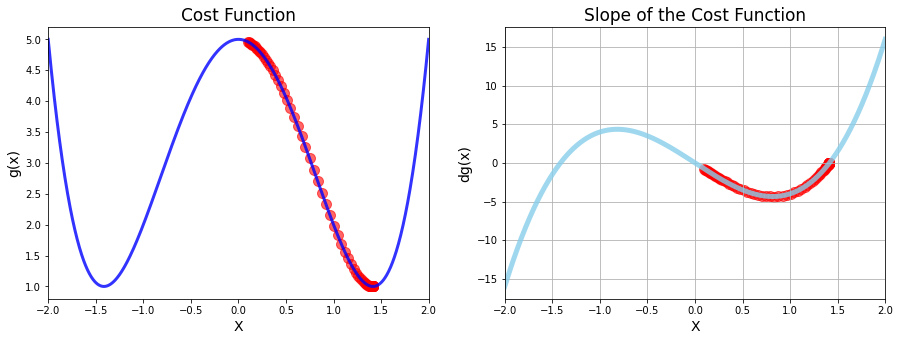

In [221]:
# Calling Gradient Descent Function
list_x , deriv_list , local_min = gradient_descent( derivative_func=dg , initial_guess=0.1 )

# Plot function & Derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# To have two plots side by side
# First chart: Cost function
plt.subplot(1,2,1) # row col index

plt.xlim([-2 , 2] )
plt.title('Cost Function', fontsize=17)
plt.xlabel('X' , fontsize=14)
plt.ylabel('g(x)' , fontsize = 14)
plt.plot( x_2 , g(x_2) , color='blue', linewidth=3,alpha=0.8)

plt.scatter( list_x , g( np.array(list_x) ) , color='r' , s =100 , alpha=0.6 )

# Second Chart: Derivative
plt.subplot( 1, 2 , 2 )
plt.xlim([-2 , 2] )
plt.title('Slope of the Cost Function', fontsize=17)
plt.grid()
plt.xlabel('X' , fontsize=14)
plt.ylabel('dg(x)' , fontsize = 14)

plt.plot( x_2, dg(x_2), color='skyblue', linewidth=5 , alpha = 0.8 )
plt.scatter( list_x , deriv_list , color='r' , s =100 , alpha=0.6 )
plt.show()

## Divergence , Overflow  & Tuples

### $$g(x) = x ^ 5 - 2 x ^ 4 + 2 $$

In [222]:
# Make Data
x_3 = np.linspace( start=-2.5 , stop=2.5 , num=1000)

def h(x):
    return x**5 - 2 * x**4 + 2

def dh(x):
    return 5 * x**4 - 8 * x**3 

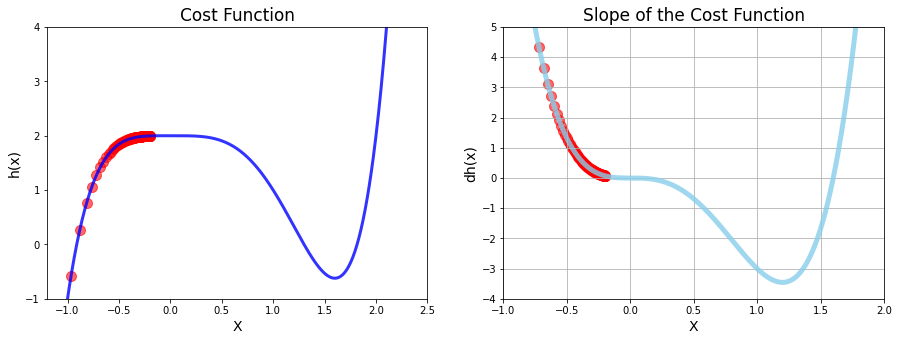

Local min occurs at:  -4.885583793105108e+53
Cost at this min is:  -2.783442996149689e+268
Number of steps:  137


In [223]:
# Calling Gradient Descent Function
list_x , deriv_list , local_min = gradient_descent( derivative_func=dh , initial_guess=-0.2 , max_iter=136 )

# Plot function & Derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# To have two plots side by side
# First chart: Cost function
plt.subplot(1,2,1) # row col index

plt.xlim([-1.2 , 2.5] )
plt.ylim( -1 , 4)
plt.title('Cost Function', fontsize=17)
plt.xlabel('X' , fontsize=14)
plt.ylabel('h(x)' , fontsize = 14)
plt.plot( x_3 , h(x_3) , color='blue', linewidth=3,alpha=0.8)

plt.scatter( list_x , h( np.array(list_x) ) , color='r' , s =100 , alpha=0.6 )

# Second Chart: Derivative
plt.subplot( 1, 2 , 2 )
plt.xlim([-1 , 2] )
plt.ylim( -4 , 5)
plt.title('Slope of the Cost Function', fontsize=17)
plt.grid()
plt.xlabel('X' , fontsize=14)
plt.ylabel('dh(x)' , fontsize = 14)

plt.plot( x_3, dh(x_3), color='skyblue', linewidth=5 , alpha = 0.8 )
plt.scatter( list_x , deriv_list , color='r' , s =100 , alpha=0.6 )
plt.show()


print('Local min occurs at: ' , local_min )
print('Cost at this min is: ', h(local_min))
print('Number of steps: ', len(list_x) )

In [224]:
import sys
sys.float_info.max

1.7976931348623157e+308

## Learning Rate

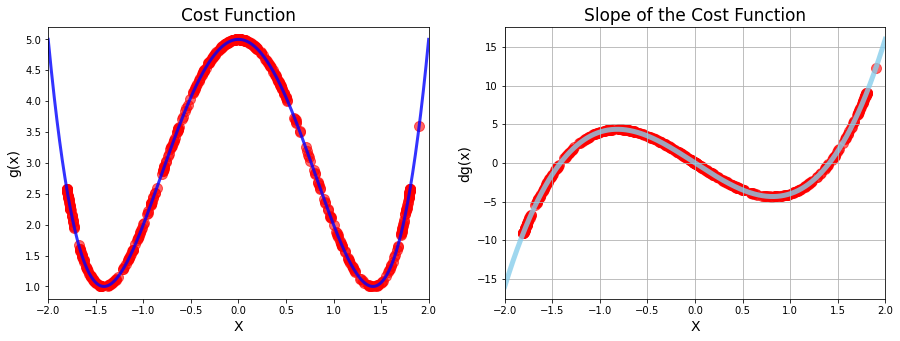

Number of steps:  501


In [225]:
# Calling Gradient Descent Function
list_x , deriv_list , local_min = gradient_descent( derivative_func=dg , initial_guess=1.9 , learning_rate = 0.2 , max_iter=500)

# Plot function & Derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# To have two plots side by side
# First chart: Cost function
plt.subplot(1,2,1) # row col index

plt.xlim([-2 , 2] )
plt.title('Cost Function', fontsize=17)
plt.xlabel('X' , fontsize=14)
plt.ylabel('g(x)' , fontsize = 14)
plt.plot( x_2 , g(x_2) , color='blue', linewidth=3,alpha=0.8)

plt.scatter( list_x , g( np.array(list_x) ) , color='r' , s =100 , alpha=0.6 )

# Second Chart: Derivative
plt.subplot( 1, 2 , 2 )
plt.xlim([-2 , 2] )
plt.title('Slope of the Cost Function', fontsize=17)
plt.grid()
plt.xlabel('X' , fontsize=14)
plt.ylabel('dg(x)' , fontsize = 14)

plt.plot( x_2, dg(x_2), color='skyblue', linewidth=5 , alpha = 0.8 )
plt.scatter( list_x , deriv_list , color='r' , s =100 , alpha=0.6 )
plt.show()

print('Number of steps: ', len(list_x))

__If we are not careful, our algo might not converge__

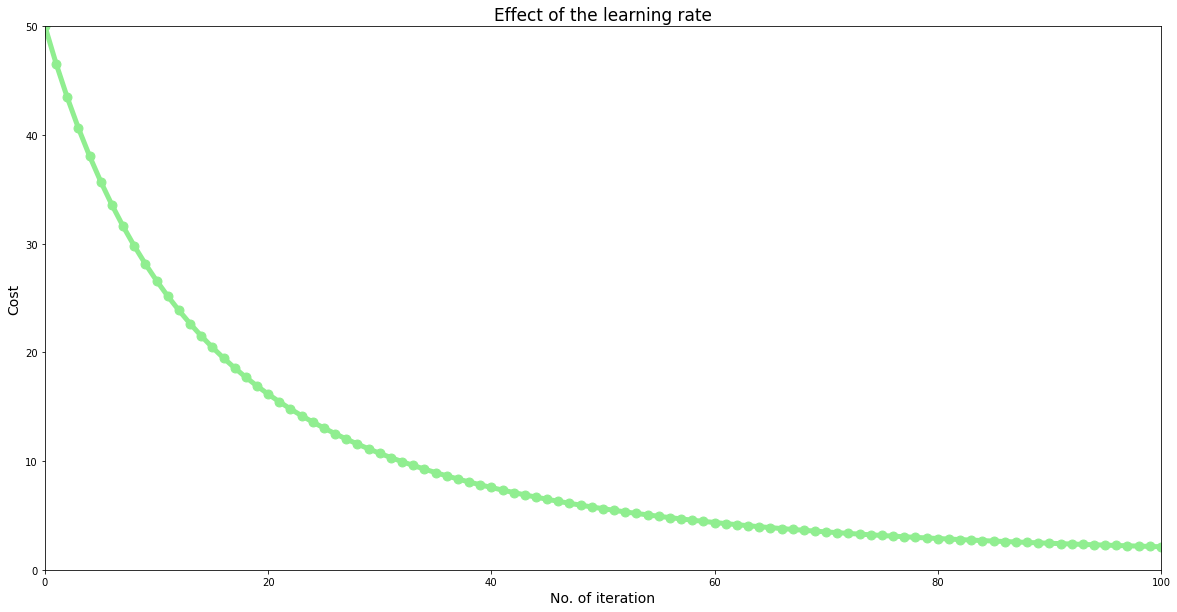

In [226]:
# Calling Gradient Descent Function
n = 100
low_gamma = gradient_descent( derivative_func=dg , initial_guess=3 , learning_rate = 0.0005 , precision=0.0001, max_iter=n)

# Plot Reduction of cost in each Iteration

plt.figure(figsize=[20,10])

# To have two plots side by side

plt.xlim([0 , n] )
plt.ylim(0,50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('No. of iteration' , fontsize=14)
plt.ylabel('Cost' , fontsize = 14)

# Values for our charts
# 1) Convert our list to numpy array
low_value = np.array(low_gamma[0])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0,n+1))

plt.plot( iteration_list , g(low_value) , color='lightgreen', linewidth=5)

plt.scatter( iteration_list , g( low_value ) , color='lightgreen' , s =80  )

plt.show()

## Example 4 - Data visualization with 3D Plot

### Minimize $$f(x,y) = \frac{1}{3^{-x^2-y^2}+1}$$
Minimize $$f(x , y ) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2-y^2}$

In [227]:
def f(x,y):
    r = 3 ** ( - x**2 - y**2 )
    return 1 / (r+1)

In [228]:
# Make some data
x_4 = np.linspace( start= -2 , stop=2, num=200)
y_4 = np.linspace( start= -2 , stop=2, num=200)

print("Shape of X Array: " , x_4.shape) # 1d array

x_4, y_4 = np.meshgrid( x_4 , y_4 )

Shape of X Array:  (200,)


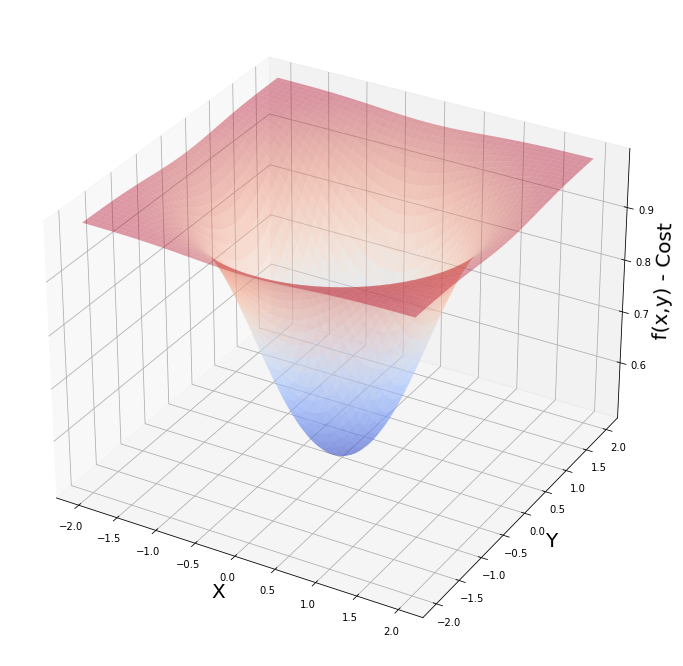

In [229]:
# Generating 3D Plot
fig = plt.figure( figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X' , fontsize = 20 )
ax.set_ylabel('Y' , fontsize = 20 )
ax.set_zlabel('f(x,y) - Cost' , fontsize = 20 )


#Creates a 3d chart but plot_surface requires 2d matrices to operate
ax.plot_surface(x_4 , y_4 , f(x_4,y_4) , cmap = cm.coolwarm , alpha = 0.4 )

## Partial Derivative & Symbolic Computation
### $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3 ^ {-x^2 - y^2}} { \left(3 ^ {-x^2 - y^2 } + 1 \right) ^ 2}$$
### $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3 ^ {-x^2 - y^2}} { \left(3 ^ {-x^2 - y^2 } + 1 \right) ^ 2}$$


In [230]:
a , b = symbols( 'x , y' )
print( 'Our cost function f(x,y) is: ', f(a,b)) # Now a , b is recognized as x & y
print('Partial derviative with respect to X: ',diff(f(a,b) , a ))
print('Partial derviative with respect to Y: ',diff(f(a,b) , b ))

f(a,b).evalf(subs = {a:1.8,b:1.0}) # Python Dictionary
diff( f(a,b) , a ).evalf( subs = {
    a:1.8,
    b:1.0
})


Our cost function f(x,y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derviative with respect to X:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Partial derviative with respect to Y:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2


0.0368089716197505

In [231]:
# Partial derivative 
def fpx(x,y):
    r = 3 ** ( - x**2 - y**2 )
    return 2 * x * log(3) * r / ( r + 1)**2

def fpy(x,y):
    r = 3 ** ( - x**2 - y**2 )
    return 2 * y * log(3) * r / ( r + 1)**2


## Batch Gradient Descent with Sympy

In [232]:
# setup
learning_rate = 0.1
max_iter = 500

params = np.array( [ 1.8 , 1.0 ] ) # initial guess

for i in range( max_iter ):
    
    gradient_x = diff( f(a,b) , a ).evalf( subs = {
        a: params[0],
        b: params[1]
    })
    
    gradient_y = diff( f(a,b) , b ).evalf( subs = {
        a:params[0],
        b:params[1]
    })
    
    gradients = np.array( [gradient_x , gradient_y])
    
    params = params - learning_rate * gradients # here we learn
    
# Results
print('Valus in gradient array: ', gradients )
print('Minimum occurs at x value of: ' , params[0] )
print('Minimum occurs at y value of: ' , params[1] )
print('The cost is: ', f( params[0] , params[1] ) )

Valus in gradient array:  [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [233]:
# setup
learning_rate = 0.1
max_iter = 500

params = np.array( [ 1.8 , 1.0 ] ) # initial guess

for i in range( max_iter ):
    
    gradient_x = fpx( params[0], params[1] )
    
    gradient_y = fpy(params[0], params[1] )
    
    gradients = np.array( [gradient_x , gradient_y])
    
    params = params - learning_rate * gradients # here we learn
    
# Results
print('Valus in gradient array: ', gradients )
print('Minimum occurs at x value of: ' , params[0] )
print('Minimum occurs at y value of: ' , params[1] )
print('The cost is: ', f( params[0] , params[1] ) )

Valus in gradient array:  [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


## Graphing 3D Descent & Adv numpy array

In [234]:
# setup
learning_rate = 0.1
max_iter = 500

params = np.array( [ 1.8 , 1.0 ] ) # initial guess
values_array = params.reshape( 1 , 2 )

for i in range( max_iter ):
    
    gradient_x = fpx( params[0], params[1] )
    
    gradient_y = fpy(params[0], params[1] )
    
    gradients = np.array( [gradient_x , gradient_y])
    
    params = params - learning_rate * gradients # here we learn
    
    values_array = np.append( arr = values_array , values= params.reshape(1,2) , axis = 0 )
    
# Results
print('Valus in gradient array: ', gradients )
print('Minimum occurs at x value of: ' , params[0] )
print('Minimum occurs at y value of: ' , params[1] )
print('The cost is: ', f( params[0] , params[1] ) )

Valus in gradient array:  [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


In [235]:
# Advanced Numpy Array Practice:

kirk = np.array([['Captain', 'Guitar']])
print( kirk.shape )

hs_band = np.array([['Black Thought' ,'MC'] , ['QuestLove', 'Drums']])
print( hs_band.shape )

the_roots = np.append( arr = hs_band , values=kirk , axis=0)
print(the_roots)

print('Print all the nicknames: ' , the_roots[ : , 0 ] )

(1, 2)
(2, 2)
[['Black Thought' 'MC']
 ['QuestLove' 'Drums']
 ['Captain' 'Guitar']]
Print all the nicknames:  ['Black Thought' 'QuestLove' 'Captain']


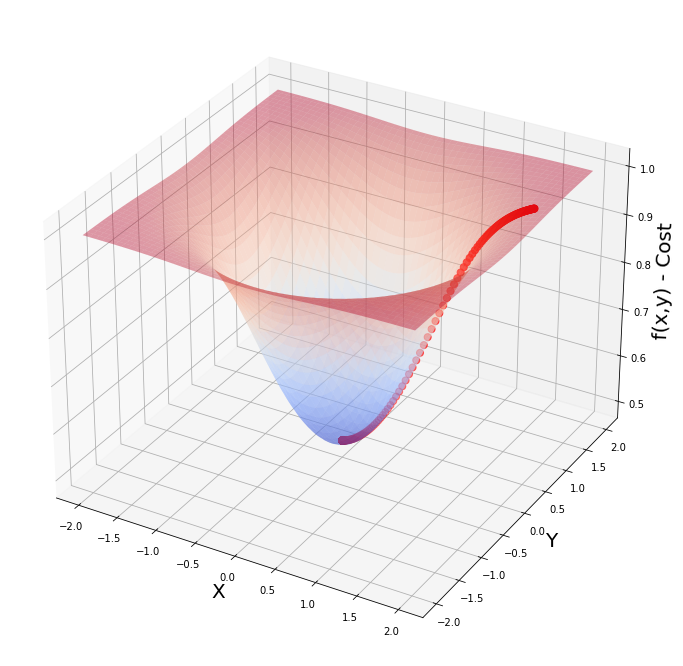

In [236]:
# Generating 3D Plot
fig = plt.figure( figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X' , fontsize = 20 )
ax.set_ylabel('Y' , fontsize = 20 )
ax.set_zlabel('f(x,y) - Cost' , fontsize = 20 )


#Creates a 3d chart but plot_surface requires 2d matrices to operate
ax.plot_surface(x_4 , y_4 , f(x_4,y_4) , cmap = cm.coolwarm , alpha = 0.4 )
ax.scatter( values_array[ : , 0 ] , values_array[ : , 1 ], f( values_array[ : , 0 ] , values_array[ : , 1 ] ), s= 50 
           , color='r' )

plt.show()

## Example 5: Working with Data & Real Cost Functions

### Mean Squared Error: a cost function for regression problem

#### $$RSS = \sum_{i=1}^n \big( y^{(i)} - h_\theta x ^ {(i)} \big)^2 $$
#### $$MSE = \frac {1}{n}\sum_{i=1}^n \big( y^{(i)} - h_\theta x ^ {(i)} \big)^2 $$
#### $$MSE = \frac {1}{n}\sum_{i=1}^n \big( y - \hat y \big)^2 $$



In [237]:
# Make sample Data
## need to transpose or reshape the array since fit method requires a 2d array
x_5 = np.array([[0.1 , 1.2 , 2.4 , 3.2 , 4.1 , 5.7 , 6.5]]).transpose()
y_5 = np.array([1.7 , 2.4 , 3.5 , 3.0 , 6.1 , 9.4 , 8.2]).reshape(7,1)

In [238]:
#Quick Linear Regression
regr = LinearRegression()

regr.fit( x_5 , y_5 )

print('Theta 0 :',regr.intercept_[0])
print('Theta 1 :' ,regr.coef_[0][0])

Theta 0 : 0.8475351486029536
Theta 1 : 1.2227264637835915


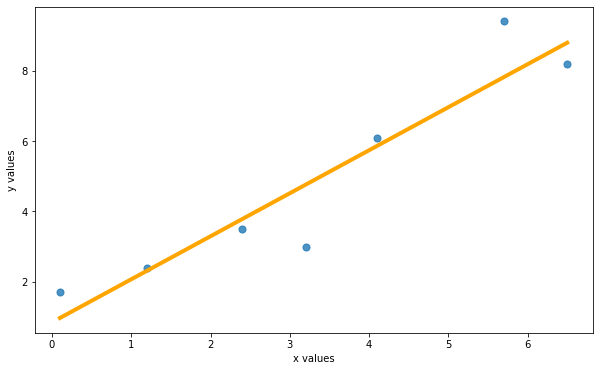

In [239]:
plt.figure(figsize=(10,6))
plt.scatter(x_5,y_5,alpha=0.8 , s = 50)

plt.plot(x_5 , regr.predict(x_5) , color='orange', linewidth=4)

# plt.title('Film Cost vs Global Revenue')
plt.xlabel('x values')
plt.ylabel('y values')
# plt.ylim(0,3000000000)
# plt.xlim(0,450000000)
plt.show()

In [240]:
# y_hat = theta0 + theta1 * x
y_hat = 0.8475351486029536 + 1.2227264637835915 * x_5
print('Estimated values of y_hat: \n', y_hat)
print('Actual values of y are: \n' , y_5)

Estimated values of y_hat: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Actual values of y are: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [241]:
# Mean square error 
def mse( y , y_hat ):
#     add = (y - y_hat)**2
#     result = sum( add )/len(y)
    result = np.average( (y - y_hat)**2 , axis=0)
    return result

In [242]:
print('Manually calculated MSE: ', mse(y_5,y_hat))
print("Using in built function: ", mean_squared_error( y_5 ,y_hat ))
print("MSE regression is: ", mean_squared_error( y_5 ,regr.predict(x_5) ))


Manually calculated MSE:  [0.94796558]
Using in built function:  0.9479655759794577
MSE regression is:  0.9479655759794577


## 3D Plot for the MSE Cost Function

### Make data for the thetas

In [243]:
nr_thetas = 200
theta_0 = np.linspace( start=-1, stop=3, num=nr_thetas)
theta_1 = np.linspace( start=-1, stop=3, num=nr_thetas)

plot_t0 , plot_t1 = np.meshgrid( theta_0 , theta_1 )

## Calculate MSE using nested for loops

In [244]:
plot_cost = np.zeros( (nr_thetas , nr_thetas) )

for i in range(nr_thetas):
    for j in range( nr_thetas ):
#         print( plot_t0[i][j])
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_cost: ', plot_cost.shape)
print('Shape of plot_t0: ', plot_t0.shape)
print('Shape of plot_t1: ', plot_t1.shape)


Shape of plot_cost:  (200, 200)
Shape of plot_t0:  (200, 200)
Shape of plot_t1:  (200, 200)


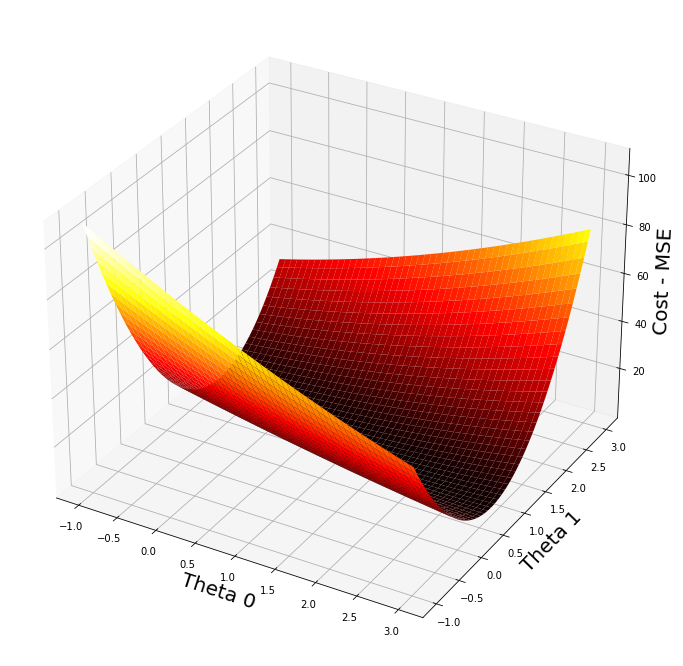

In [245]:
# Plotting MSE
fig = plt.figure( figsize = [16,12] )
ax = fig.gca( projection = '3d' )

ax.set_xlabel('Theta 0' , fontsize=20)
ax.set_ylabel('Theta 1' , fontsize=20)
ax.set_zlabel('Cost - MSE' , fontsize=20)

ax.plot_surface( plot_t0 , plot_t1 , plot_cost, cmap = cm.hot )
plt.show()


In [246]:
print('Min value of plot_cost: ', plot_cost.min())
ij_min = np.unravel_index(indices = plot_cost.argmin() , shape = plot_cost.shape)
print('Min value occurs at (i,j): ', ij_min)
print('Min MSE value for Theta 0 at plot_t0[111][91]: ', plot_t0[111][91])
print('Min MSE value for Theta 1 at plot_t1[111][91]: ', plot_t1[111][91])


Min value of plot_cost:  0.9483826526747164
Min value occurs at (i,j):  (111, 91)
Min MSE value for Theta 0 at plot_t0[111][91]:  0.829145728643216
Min MSE value for Theta 1 at plot_t1[111][91]:  1.2311557788944723


## Partial Derivative of MSE w.r.t. $\theta_0$ and $\theta_1$ 
### $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)}-\theta_0 - \theta_1 x^{(i)} \big)$$
### $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)}-\theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$


## MSE & Gradient Descent

In [247]:
# x values , y values & array of theta parameters( theta 0 at index 0 , theta 1 at index 1)
def grad(x , y , thetas ):
    n = y.size
    
    theta0_slope = (-2/n) * sum( y - thetas[0] - thetas[1] * x )
    theta1_slope = (-2/n) * sum( (y - thetas[0] - thetas[1] * x) * x )
    
    return np.array( [ theta0_slope[0] , theta1_slope[0] ] )

In [250]:
learning_rate = 0.01
thetas = np.array([2.9,2.9])

# Collect data point for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse( y_5 , thetas[0] + thetas[1] * x_5)

for i in range(1000):
    thetas = thetas - learning_rate * grad( x_5 , y_5 , thetas )
    
    # Append the new values
    plot_vals = np.append( arr = plot_vals , values= thetas.reshape(1,2) , axis=0)
    mse_vals = np.append( arr = mse_vals , values= mse( y_5 , thetas[0] + thetas[1] * x_5) , axis = 0)

print('Min occurs at Theta 0: ', thetas[0])
print('Min occurs at Theta 1: ', thetas[1])
print('MSE is : ', mse( y_5 , thetas[0] + thetas[1] * x_5 ) ) 

Min occurs at Theta 0:  0.8532230461743415
Min occurs at Theta 1:  1.2214935332607393
MSE is :  [0.94797511]


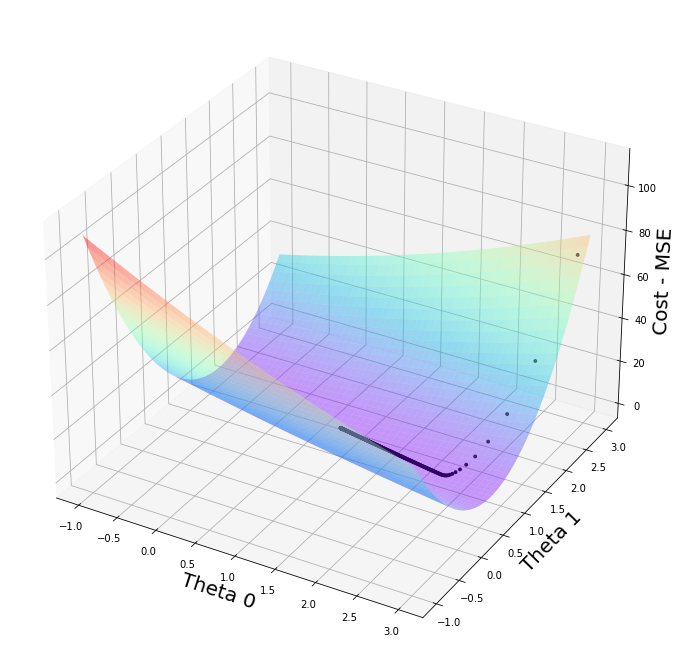

In [254]:
# Plotting MSE
fig = plt.figure( figsize = [16,12] )
ax = fig.gca( projection = '3d' )

ax.set_xlabel('Theta 0' , fontsize=20)
ax.set_ylabel('Theta 1' , fontsize=20)
ax.set_zlabel('Cost - MSE' , fontsize=20)

ax.scatter( plot_vals[:,0], plot_vals[:,1], mse_vals, s = 8 , color = 'black' )
ax.plot_surface( plot_t0 , plot_t1 , plot_cost, cmap = cm.rainbow , alpha = 0.4)
plt.show()
